In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
tickers = ['NVDA', 'APP', 'VST', 'VRT', 'MSTR', 'CVNA', 'COHR', 'NTRA', 'FTAI',
           'AUR', 'ASTS', 'MOD', 'ZETA', 'PI', 'LUMN', 'BMA', 'HIMS', 'OSCR', 
           'SG', 'DYN', 'EWTX', 'POWL', 'SRRK', 'EVGO', 'RSI', 'CLOV', 'PLTR', 'RBLX', 
           'SNOW', 'UPST', 'TSLA', 'SHOP', 'SQ', 'MDB', 'DDOG', 'NET', 'CRWD', 
           'ZS', 'PATH', 'FVRR', 'SE', 'CRSP', 'PYPL', 'NFLX', 'AMD', 'INTC', 
           'DIS', 'BA', 'CSCO', 'IBM']
 # Example tickers
data = yf.download(tickers, start='2022-01-01', end='2024-05-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()
print(returns)

[*********************100%***********************]  50 of 50 completed


Ticker                          AMD       APP      ASTS       AUR        BA  \
Date                                                                          
2022-01-04 00:00:00+00:00 -0.038738 -0.061136 -0.034063 -0.073024  0.027759   
2022-01-05 00:00:00+00:00 -0.057264 -0.074258 -0.089421 -0.084337 -0.002621   
2022-01-06 00:00:00+00:00  0.000588  0.001463  0.024896 -0.045547 -0.008119   
2022-01-07 00:00:00+00:00 -0.031050 -0.020694  0.006748 -0.082715  0.019684   
2022-01-10 00:00:00+00:00  0.000000  0.030951 -0.054960 -0.067052 -0.028724   
...                             ...       ...       ...       ...       ...   
2024-04-24 00:00:00+00:00 -0.003481 -0.020861 -0.004651 -0.003509 -0.028668   
2024-04-25 00:00:00+00:00  0.013312 -0.007030  0.023364 -0.007042  0.015092   
2024-04-26 00:00:00+00:00  0.023673  0.066609  0.018265  0.070922  0.002458   
2024-04-29 00:00:00+00:00  0.017789 -0.011244  0.044843  0.009934  0.037496   
2024-04-30 00:00:00+00:00 -0.011361 -0.033155 -0.051

In [37]:
import cvxpy as cp
import numpy as np

# Assuming 'returns' is defined and is a DataFrame with the returns of the assets
mean_returns = returns.mean().values  # Convert to a NumPy array
cov_matrix = returns.cov().values  # Convert to a NumPy array for consistency

# Define the number of assets
n_assets = len(tickers)

# Portfolio weights as a variable
weights = cp.Variable(n_assets)
print(cov_matrix)

# Risk (volatility) as the objective function to minimize
portfolio_risk = cp.quad_form(weights, cov_matrix)
print(f"portfolio risk{portfolio_risk}")

# Define constraints (e.g., weights sum to 1, expected return constraint)
constraints = [
    cp.sum(weights) == 1,  # Weights must sum to 1
    mean_returns @ weights >= 0.005,  # Minimum expected return (optional)
    weights >= -1,  # Allow no short-selling (you can change this if needed)
    weights <= 0.5   # Weights cannot exceed 1
]

# Optimization problem
problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)

# Solve the problem
problem.solve()

# Optimal portfolio weights
optimal_weights = weights.value

# Output the results
print("Optimal Weights:", optimal_weights)
print("Problem status:", problem.status)
print("Mean Returns:", mean_returns)


[[0.00116853 0.0007007  0.00059083 ... 0.00024285 0.00058074 0.00069792]
 [0.0007007  0.00236381 0.0007792  ... 0.00019828 0.00075562 0.00101327]
 [0.00059083 0.0007792  0.00354451 ... 0.00016617 0.00057946 0.00069425]
 ...
 [0.00024285 0.00019828 0.00016617 ... 0.00044394 0.00016942 0.00017751]
 [0.00058074 0.00075562 0.00057946 ... 0.00016942 0.0017972  0.00080007]
 [0.00069792 0.00101327 0.00069425 ... 0.00017751 0.00080007 0.00154131]]
portfolio riskQuadForm(var1406, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]])
Optimal Weights: [-1.84359889e-01  3.18403893e-02 -9.43552086e-05 -1.31527511e-02
 -1.08218992e-01  1.08855290e-01 -8.79957030e-02 -2.21510959e-02
 -5.03055411e-03  1.90289482e-01  4.86304858e-02  3.34730927e-02
 -1.55330567e-02 -5.55448439e-02  5.06880676e-02 -5.58853841e-02
  2.55842729e-02  9.11568073e-02 -4.04275421e-02  9.13917350e-02
  4.32469805e-01 -2.14838735e-02 -1.08565735e-01 -3.69033004e-02
  

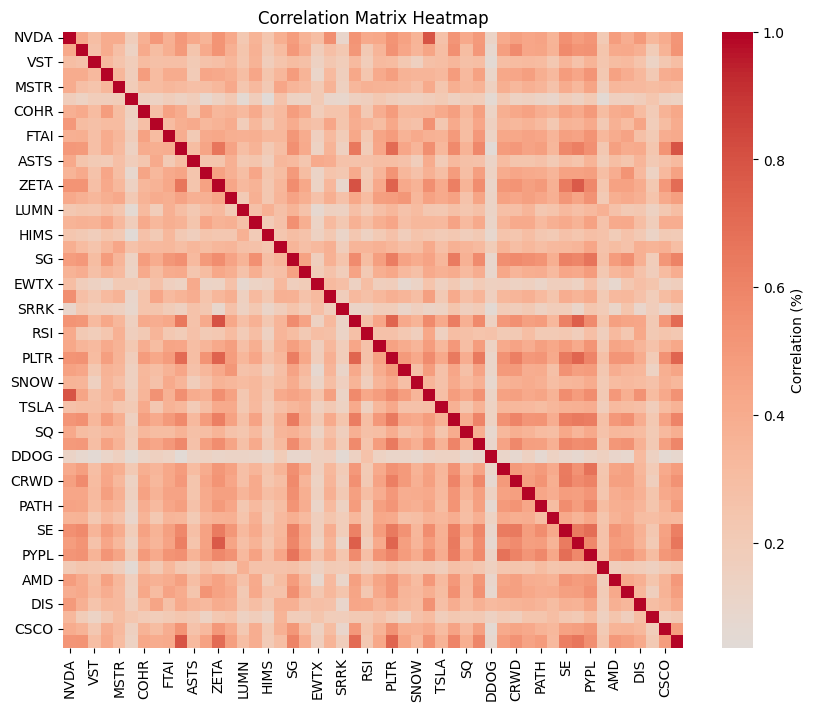

In [40]:
# Calculate correlation matrix instead of covariance
corr_matrix = returns.corr() * 100  # Convert to percentage

# Calculate standard deviations
std_devs = np.sqrt(np.diag(cov_matrix))

# Compute the correlation matrix
correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)

# Convert to DataFrame and add stock names
correlation_df = pd.DataFrame(correlation_matrix, index=tickers, columns=tickers)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=False, fmt=".2%", cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation (%)'})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [33]:

# Calculate the standard deviations (square root of the diagonal elements)
std_devs = np.sqrt(np.diag(cov_matrix))

# Create the correlation matrix by dividing the covariance matrix by the product of std deviations
correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)

# Convert to a DataFrame for easier interpretation if desired
correlation_df = pd.DataFrame(correlation_matrix)
print(correlation_df)

          0         1         2         3         4         5         6   \
0   1.000000  0.421605  0.290314  0.398107  0.399782  0.178167  0.375405   
1   0.421605  1.000000  0.269193  0.402889  0.286099  0.137287  0.415618   
2   0.290314  0.269193  1.000000  0.328183  0.258064  0.184215  0.308895   
3   0.398107  0.402889  0.328183  1.000000  0.339363  0.174099  0.478512   
4   0.399782  0.286099  0.258064  0.339363  1.000000  0.191315  0.300499   
5   0.178167  0.137287  0.184215  0.174099  0.191315  1.000000  0.152290   
6   0.375405  0.415618  0.308895  0.478512  0.300499  0.152290  1.000000   
7   0.501958  0.302535  0.273222  0.310248  0.308826  0.139699  0.284814   
8   0.377695  0.388188  0.285646  0.404087  0.342840  0.180272  0.459016   
9   0.500365  0.496997  0.281574  0.398330  0.316873  0.146071  0.397498   
10  0.421559  0.247760  0.206203  0.200092  0.287393  0.174154  0.237327   
11  0.355315  0.416103  0.258179  0.433055  0.290067  0.086594  0.439626   
12  0.531961

In [ ]:
print("Weights Variable Shape:", weights.shape)
print("Covariance Matrix Shape:", cov_matrix.shape)

print(cov_matrix)

weights = cp.Variable(n_assets)
This creates a CVXPY variable representing the portfolio weights.
CVXPY Variable: A decision variable for the optimization problem. Each entry in weights corresponds to the proportion of the portfolio invested in a specific stock.
The number of variables (i.e., the number of weights) is equal to n_assets.


portfolio_risk = cp.quad_form(weights, cov_matrix)

portfolio_risk:
This calculates the risk of the portfolio, which is the variance of the portfolio's return.
cp.quad_form: This is a special function in CVXPY that calculates the quadratic form of the covariance matrix and the portfolio weights, which gives the portfolio's variance (or risk).
The risk formula used here is:
Risk=𝑤𝑇Σ𝑤

where:
w are the portfolio weights (the decision variable),
Σ is the covariance matrix of the asset returns.


constraints = [cp.sum(weights) == 1, mean_returns @ weights >= 0.01, weights >= 0, weights <= 1]
cp.sum(weights) == 1:
This ensures that the sum of all portfolio weights equals 1. In other words, the entire portfolio must be fully invested (no money is left uninvested).
mean_returns @ weights >= 0.01:
This constraint ensures that the portfolio’s expected return is at least 0.01 (or 1%). It uses matrix multiplication between the expected returns (mean_returns) and the portfolio weights (weights).
weights >= 0, weights <= 1:
These constraints enforce that the portfolio weights must be between 0 and 1 for each stock. This ensures no short selling (negative weights) or over-investment in any one asset (weights exceeding 1).


problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
problem.solve()
cp.Problem:
This defines the optimization problem. The goal is to minimize the portfolio risk (portfolio_risk), subject to the specified constraints (constraints).
problem.solve():
This solves the optimization problem using an appropriate solver (automatically selected by CVXPY). It finds the set of portfolio weights that minimizes risk while satisfying the constraints.

optimal_weights = weights.value
print("Optimal Weights:", optimal_weights)
weights.value:
After solving the problem, the .value attribute of weights contains the optimal portfolio weights (the fractions of the portfolio allocated to each stock).
print("Optimal Weights:", optimal_weights):
This simply prints out the optimal weights for each asset in the portfolio. These weights are the result of the optimization, representing the best balance between risk and return.

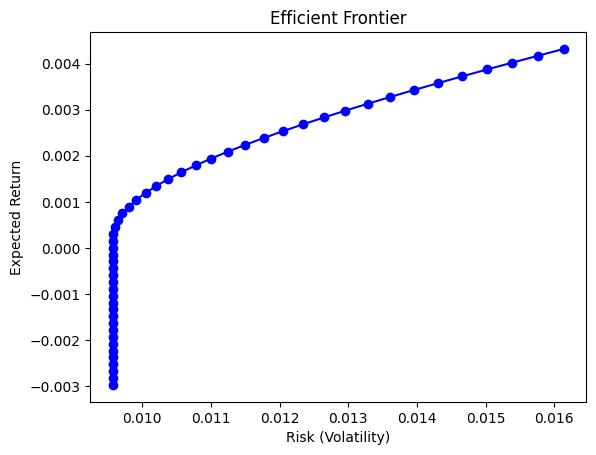

In [15]:
import matplotlib.pyplot as plt

# Define a range of target returns
target_returns = np.linspace(min(mean_returns), max(mean_returns), 50)

risks = []
for target_return in target_returns:
    # Update the constraint for the current target return
    constraints = [cp.sum(weights) == 1, mean_returns @ weights >= target_return]
    problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
    problem.solve()
    risks.append(np.sqrt(portfolio_risk.value))  # Store the risk (volatility)

# Plot the efficient frontier
plt.plot(risks, target_returns, 'b-o')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()


In [16]:
print("Optimal Weights:", optimal_weights)


Optimal Weights: [-1.84359889e-01  3.18403893e-02 -9.43552086e-05 -1.31527511e-02
 -1.08218992e-01  1.08855290e-01 -8.79957030e-02 -2.21510959e-02
 -5.03055411e-03  1.90289482e-01  4.86304858e-02  3.34730927e-02
 -1.55330567e-02 -5.55448439e-02  5.06880676e-02 -5.58853841e-02
  2.55842729e-02  9.11568073e-02 -4.04275421e-02  9.13917350e-02
  4.32469805e-01 -2.14838735e-02 -1.08565735e-01 -3.69033004e-02
  1.89987390e-01  1.91548812e-02 -3.05065032e-02  8.87878057e-02
  2.77767477e-02  1.23082497e-01  5.45230724e-02 -4.43402769e-03
  4.92065209e-02  3.51228340e-02  9.42549288e-02 -8.52584155e-02
  1.00687505e-02 -4.57363938e-02 -2.40044054e-02 -2.40049332e-02
  2.59602914e-02 -9.45014110e-03 -1.00503111e-01 -1.25675603e-02
 -4.94375492e-02  2.58487977e-03 -2.37620758e-02  3.58779784e-01
  5.66641422e-02 -7.53217626e-02]


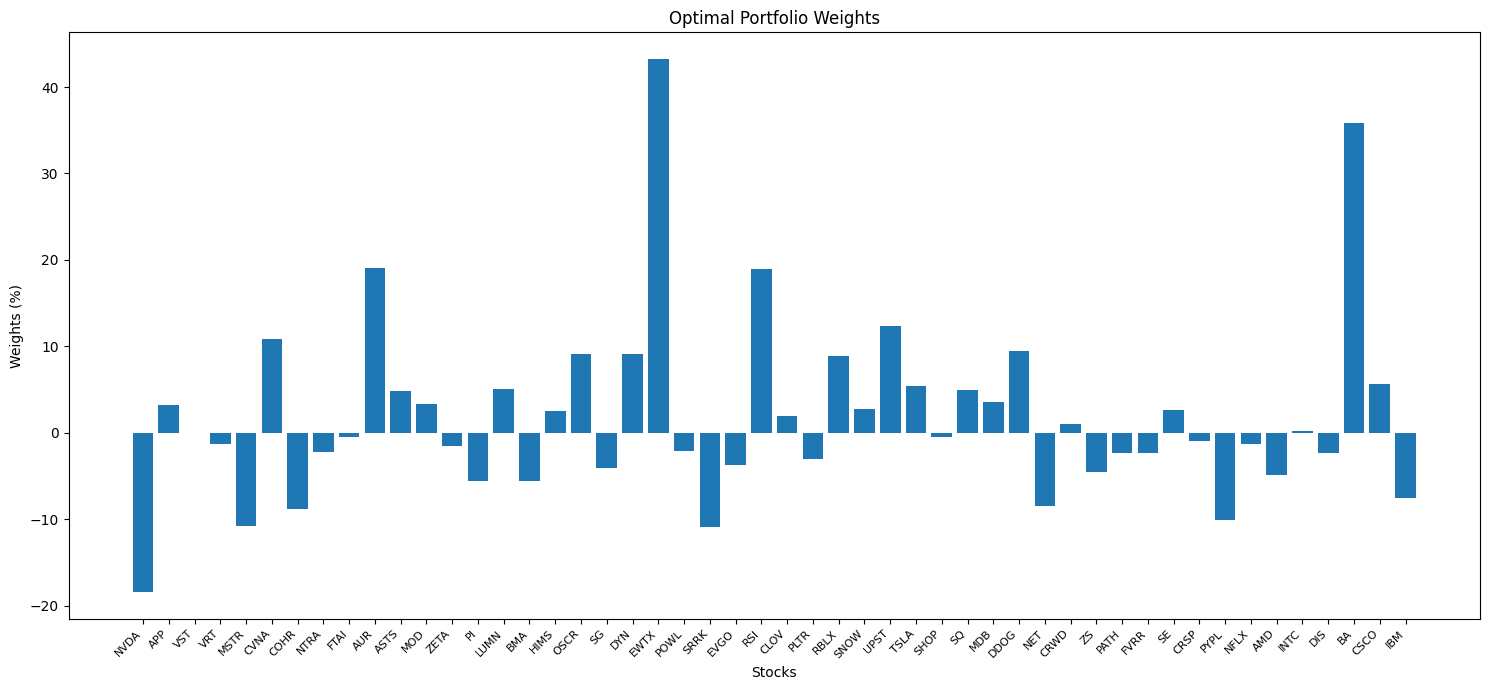

In [18]:

# Assuming 'optimal_weights' is a NumPy array or a list with the optimal weights
# Convert weights to percentage
percentage_weights = optimal_weights * 100

# Increase figure size
plt.figure(figsize=(15, 7))  # Make the figure wider

# Plot the optimal weights
plt.bar(tickers, percentage_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights (%)')  # Update y-axis label to indicate percentage
plt.title('Optimal Portfolio Weights')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust horizontal alignment and font size

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

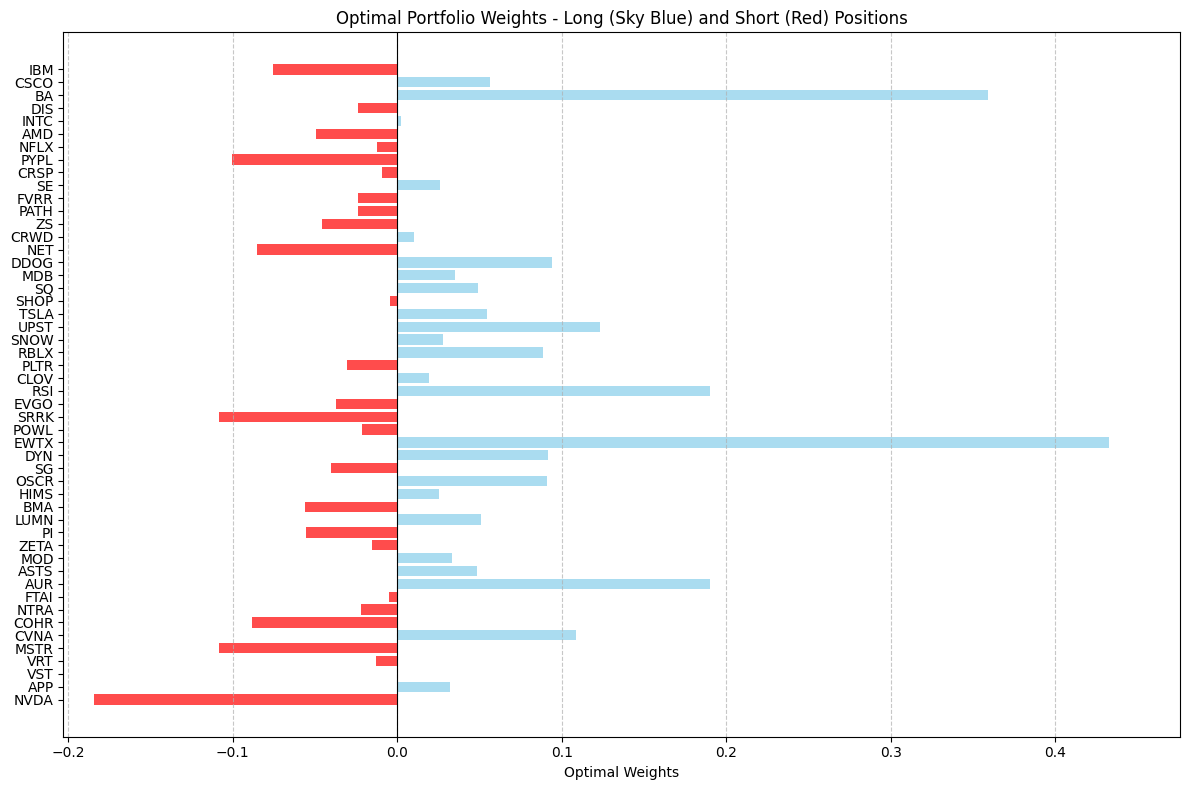

In [24]:

# Create colors based on weights
colors = ['skyblue' if weight >= 0 else 'red' for weight in optimal_weights]

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))

# Plot weights with specified colors
plt.barh(tickers, optimal_weights, color=colors, alpha=0.7)

# Set x-axis limits to provide clarity
plt.xlim(min(optimal_weights) * 1.1, max(optimal_weights) * 1.1)

# Add labels and title
plt.xlabel('Optimal Weights')
plt.title('Optimal Portfolio Weights - Long (Sky Blue) and Short (Red) Positions')

# Add vertical line at 0 for better visual understanding
plt.axvline(0, color='black', lw=0.8)

# Show grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout
plt.show()